In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, GlobalMaxPool1D
from keras.optimizers import Adam, SGD
from keras.losses import categorical_crossentropy as CC
from tensorflow.keras.layers import GlobalMaxPooling1D

In [ ]:
# Help function to plot model loss/accuracy (credit: deep learning course material)
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

In [ ]:
data = pd.read_csv('mbti_1.csv')

In [ ]:

labenc = LabelEncoder()
types = labenc.fit_transform(data['type'])
types = types.reshape(-1,1)

ohe = OneHotEncoder(sparse=False)
types = ohe.fit_transform(types)

tfTokenizer = Tokenizer()
tfTokenizer.fit_on_texts(data['posts'])


seq = tfTokenizer.texts_to_sequences(data['posts'])
seq = sequence.pad_sequences(seq)

X_tr, X_ts, y_tr, y_ts = train_test_split(seq, 
                                          types, 
                                          test_size=0.4, 
                                          random_state=123)

X_ts, X_val, y_ts, y_val = train_test_split(X_ts, 
                                          y_ts, 
                                          test_size=0.5, 
                                          random_state=123)

In [ ]:
RandOverSampled = RandomOverSampler(sampling_strategy='not majority', 
                                    random_state=123)
over_X, over_y = RandOverSampled.fit_resample(X_tr, y_tr)

## LSTM


### Configuration 1

In [ ]:
input_dim = len(tfTokenizer.word_index)+1
input_len = 1945
output_dim = 64

model3 = Sequential()

model3.add(Embedding(input_dim=input_dim,output_dim=output_dim, 
                    input_length=input_len, mask_zero=True))
model3.add(Bidirectional(LSTM(units=output_dim, return_sequences=True)))
model3.add(GlobalMaxPool1D())
model3.add(Dropout(0.25))
model3.add(Dense(16, activation = 'softmax'))
model3.compile(loss = CC, optimizer = 'Adam', metrics = ['accuracy'])

print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1945, 64)          10246080  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1945, 128)         66048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
Total params: 10,314,192
Trainable params: 10,314,192
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 100
epochs = 10

history = model3.fit(x=over_X,
                    y=over_y, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(X_val,y_val))

Epoch 1/10
173/173 [==============================] - 905s 5s/step - loss: 2.7123 - accuracy: 0.1798 - val_loss: 2.6977 - val_accuracy: 0.0720
Epoch 2/10
173/173 [==============================] - 954s 6s/step - loss: 1.7638 - accuracy: 0.5251 - val_loss: 2.2406 - val_accuracy: 0.2127
Epoch 3/10
173/173 [==============================] - 962s 6s/step - loss: 0.8515 - accuracy: 0.7855 - val_loss: 2.1360 - val_accuracy: 0.2893
Epoch 4/10
173/173 [==============================] - 959s 6s/step - loss: 0.4326 - accuracy: 0.8920 - val_loss: 2.0723 - val_accuracy: 0.3389
Epoch 5/10
173/173 [==============================] - 960s 6s/step - loss: 0.2614 - accuracy: 0.9461 - val_loss: 2.1100 - val_accuracy: 0.3625
Epoch 6/10
173/173 [==============================] - 958s 6s/step - loss: 0.1403 - accuracy: 0.9765 - val_loss: 2.2162 - val_accuracy: 0.3360
Epoch 7/10
173/173 [==============================] - 959s 6s/step - loss: 0.0729 - accuracy: 0.9903 - val_loss: 2.3449 - val_accuracy: 0.3522

In [ ]:
scores_tr = model3.evaluate(X_tr, y_tr, verbose=1)
scores_ts = model3.evaluate(X_ts, y_ts, verbose=1)

print("Train Accuracy:",scores_tr[1])
print("Test Accuracy:", scores_ts[1])

55/55 [==============================] - 31s 558ms/step - loss: 2.5205 - accuracy: 0.3597
Train Accuracy: 1.0
Test Accuracy: 0.35965418815612793


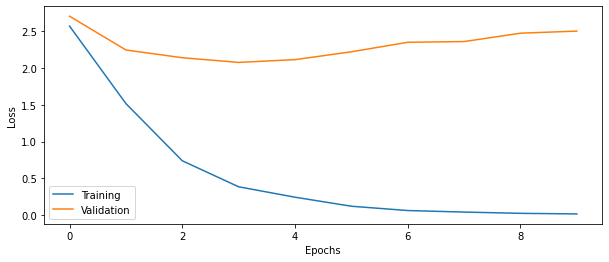

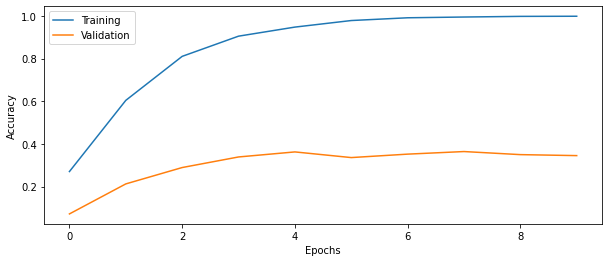

In [ ]:
plot_results(history)

### Configuration 2

In [ ]:
batch_size = 100
epochs = 10

history2 = model3.fit(x=X_tr,
                    y=y_tr, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(X_val,y_val))

Epoch 1/10
53/53 [==============================] - 305s 6s/step - loss: 2.6004 - accuracy: 0.1773 - val_loss: 2.2772 - val_accuracy: 0.2144
Epoch 2/10
53/53 [==============================] - 297s 6s/step - loss: 2.3064 - accuracy: 0.1881 - val_loss: 2.2510 - val_accuracy: 0.2478
Epoch 3/10
53/53 [==============================] - 280s 5s/step - loss: 2.2427 - accuracy: 0.2570 - val_loss: 2.1513 - val_accuracy: 0.2963
Epoch 4/10
53/53 [==============================] - 280s 5s/step - loss: 2.1376 - accuracy: 0.3329 - val_loss: 2.0200 - val_accuracy: 0.3994
Epoch 5/10
53/53 [==============================] - 281s 5s/step - loss: 1.9189 - accuracy: 0.4545 - val_loss: 1.7992 - val_accuracy: 0.4732
Epoch 6/10
53/53 [==============================] - 280s 5s/step - loss: 1.6860 - accuracy: 0.5172 - val_loss: 1.6811 - val_accuracy: 0.5210
Epoch 7/10
53/53 [==============================] - 280s 5s/step - loss: 1.4186 - accuracy: 0.6051 - val_loss: 1.6323 - val_accuracy: 0.5233
Epoch 8/10
53

In [ ]:
scores_tr2 = model3.evaluate(X_tr, y_tr, verbose=1)
scores_ts2 = model3.evaluate(X_ts, y_ts, verbose=1)

print("Train Accuracy:",scores_tr2[1])
print("Test Accuracy:", scores_ts2[1])

55/55 [==============================] - 29s 521ms/step - loss: 1.7324 - accuracy: 0.5153
Train Accuracy: 0.8078770637512207
Test Accuracy: 0.5152737498283386


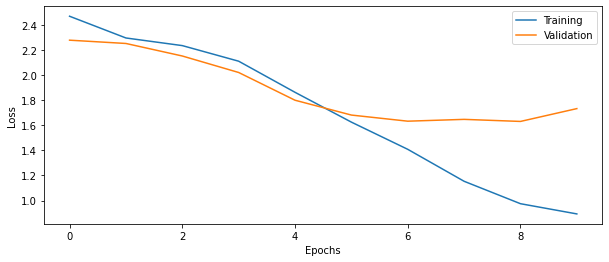

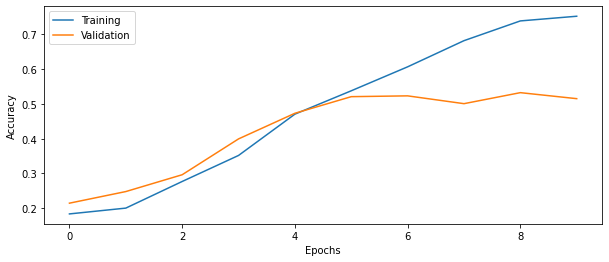

In [ ]:
plot_results(history2)

### Configuration 3

In [ ]:
input_dim = len(tfTokenizer.word_index)+1
input_len = 1945
output_dim = 100

model5 = Sequential()

model5.add(Embedding(input_dim=input_dim,output_dim=output_dim, 
                    input_length=input_len, mask_zero=True))
model5.add(Dropout(0.5))
model5.add(Bidirectional(LSTM(units=output_dim, return_sequences=True)))
model5.add(GlobalMaxPool1D())
model5.add(Dropout(0.5))
model5.add(Dense(16, activation = 'softmax'))
model5.compile(loss = CC, optimizer = 'Adam', metrics = ['accuracy'])

print(model5.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1945, 100)         16009500  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1945, 100)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1945, 200)         160800    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 200)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                3216      
Total params: 16,173,516
Trainable params: 16,173,516
Non-trainable params: 0
__________________________________________

In [ ]:
batch_size = 100
epochs = 15

history3 = model5.fit(x=X_tr,
                    y=y_tr, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(X_val,y_val))

Epoch 1/15
53/53 [==============================] - 662s 12s/step - loss: 2.4422 - accuracy: 0.1685 - val_loss: 2.2959 - val_accuracy: 0.2202
Epoch 2/15
53/53 [==============================] - 638s 12s/step - loss: 2.3098 - accuracy: 0.1987 - val_loss: 2.2680 - val_accuracy: 0.2202
Epoch 3/15
53/53 [==============================] - 640s 12s/step - loss: 2.2778 - accuracy: 0.2371 - val_loss: 2.1840 - val_accuracy: 0.3020
Epoch 4/15
53/53 [==============================] - 629s 12s/step - loss: 2.1020 - accuracy: 0.3664 - val_loss: 1.9606 - val_accuracy: 0.4248
Epoch 5/15
53/53 [==============================] - 627s 12s/step - loss: 1.9240 - accuracy: 0.4359 - val_loss: 1.8170 - val_accuracy: 0.4830
Epoch 6/15
53/53 [==============================] - 633s 12s/step - loss: 1.7603 - accuracy: 0.4845 - val_loss: 1.8165 - val_accuracy: 0.4576
Epoch 7/15
53/53 [==============================] - 631s 12s/step - loss: 1.6858 - accuracy: 0.5036 - val_loss: 1.7030 - val_accuracy: 0.5049
Epoch 

In [ ]:
scores_tr3 = model5.evaluate(X_tr, y_tr, verbose=1)
scores_ts3 = model5.evaluate(X_ts, y_ts, verbose=1)

print("Train Accuracy:",scores_tr3[1])
print("Test Accuracy:", scores_ts3[1])

55/55 [==============================] - 47s 854ms/step - loss: 1.8336 - accuracy: 0.4369
Train Accuracy: 0.6847262382507324
Test Accuracy: 0.43688762187957764


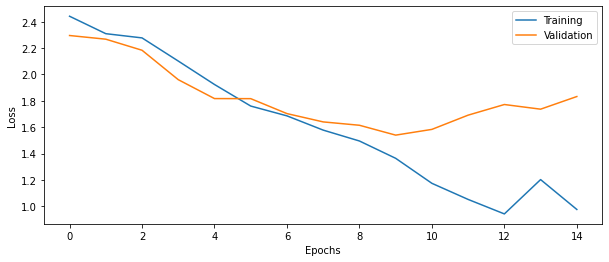

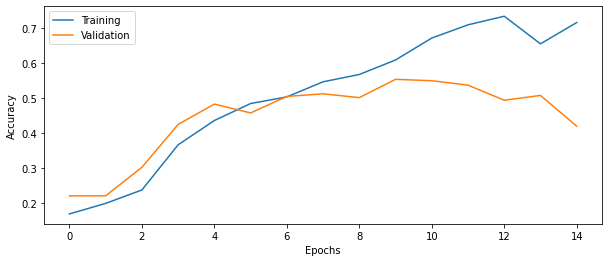

In [ ]:
plot_results(history3)